In [1]:
import numpy as np
import cv2
import sys
import tiffcapture as tc
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as ndi
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import feature


In [2]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [3]:
frames = []
tiff = tc.opentiff('../doc/ChCl_CA_DES_96_5_17_19.tiff')
for img in tiff:
    frames.append(img)

In [4]:
len(frames)

3076

In [5]:
test_frames = []
test_tiff = tc.opentiff('../doc/TestVideo.tiff')
for img in test_tiff:
    test_frames.append(img)

In [6]:
image = test_frames[100]

In [7]:
gaus = gaussian(image,sigma=0.5)
sob = sobel(gaus)
edges = sobel(sob)>0.00015

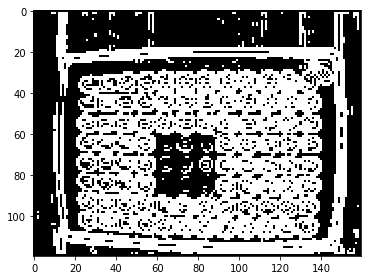

In [8]:
io.imshow(edges)

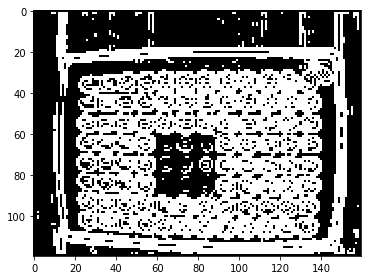

In [9]:
io.imshow(edges)

In [81]:
img1 = test_frames[400][20:113,15:145]

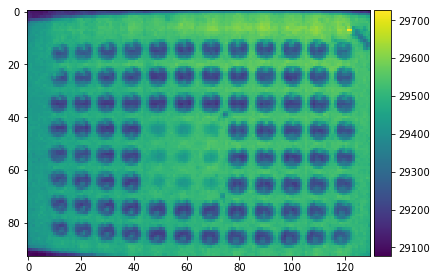

In [89]:
io.imshow(img1)

(82, 118)

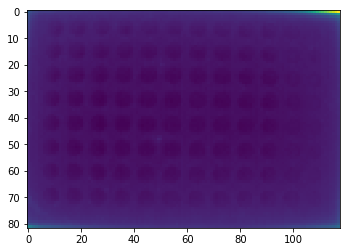

In [11]:
img2 = frames[200][16:98,20:138]
plt.imshow(img2)
img2.shape

In [91]:
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)

In [92]:
descriptor_extractor = ORB(n_keypoints=96)

In [154]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

# descriptor_extractor.detect_and_extract(img2)
# keypoints2 = descriptor_extractor.keypoints
# descriptors2 = descriptor_extractor.descriptors

RuntimeError: ORB found no features. Try passing in an image containing greater intensity contrasts between adjacent pixels.

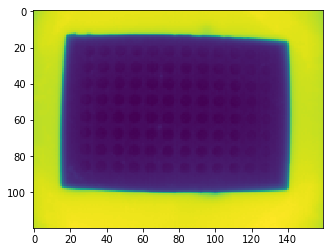

In [152]:
tiff = tc.opentiff('../doc/ChCl_CA_DES_96_5_17_19.tiff')
plt.imshow(tiff.read()[1])
plt.show()
tiff.release()

In [153]:
cap= cv2.VideoCapture('../doc/ChCl_CA_DES_96_5_17_19.tiff')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('frame'+str(i)+'.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()